### Data initialization

In [1]:
import pandas as pd
import os

# Define the path to the folder containing the CSV files
csv_folder = 'csv files/csv files'

# Load each CSV file into a separate DataFrame
games_df = pd.read_csv(os.path.join(csv_folder, 'games.csv'))
players_df = pd.read_csv(os.path.join(csv_folder, 'players.csv'))
plays_df = pd.read_csv(os.path.join(csv_folder, 'plays.csv'))
tackles_df = pd.read_csv(os.path.join(csv_folder, 'tackles.csv'))
# tracking_week_1_df = pd.read_csv(os.path.join(csv_folder, 'tracking_week_1.csv'))
# tracking_week_2_df = pd.read_csv(os.path.join(csv_folder, 'tracking_week_2.csv'))
# tracking_week_3_df = pd.read_csv(os.path.join(csv_folder, 'tracking_week_3.csv'))
# tracking_week_4_df = pd.read_csv(os.path.join(csv_folder, 'tracking_week_4.csv'))
# tracking_week_5_df = pd.read_csv(os.path.join(csv_folder, 'tracking_week_5.csv'))
# tracking_week_6_df = pd.read_csv(os.path.join(csv_folder, 'tracking_week_6.csv'))
# tracking_week_7_df = pd.read_csv(os.path.join(csv_folder, 'tracking_week_7.csv'))
# tracking_week_8_df = pd.read_csv(os.path.join(csv_folder, 'tracking_week_8.csv'))
# tracking_week_9_df = pd.read_csv(os.path.join(csv_folder, 'tracking_week_9.csv'))

### BMI evaluation

In [11]:
players_df

,nflId,height,weight,birthDate,collegeName,position,displayName
0,25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady
1,29550,6-4,328,1982-01-22,Arkansas,T,Jason Peters
2,29851,6-2,225,1983-12-02,California,QB,Aaron Rodgers
3,30842,6-6,267,1984-05-19,UCLA,TE,Marcedes Lewis
4,33084,6-4,217,1985-05-17,Boston College,QB,Matt Ryan
...,...,...,...,...,...,...,...
1678,55200,6-6,266,NaN,Indiana,DT,Ryder Anderson
1679,55212,6-0,230,NaN,Iowa State,ILB,Jake Hummel
1680,55239,6-2,300,NaN,Pennsylvania,DT,Prince Emili
1681,55240,6-1,185,NaN,Buffalo,CB,Ja'Marcus Ingram


In [12]:
def convert_height_to_meters(height):
    # Split the height into feet and inches
    feet, inches = map(int, height.split('-'))
    # Convert height to inches
    total_inches = feet * 12 + inches
    # Convert inches to cm (1 inch = 2.54 cm)
    height_cm = total_inches * 2.54
    # Convert cm to meters
    height_m = height_cm / 100
    return height_m

players_df['height_m'] = players_df['height'].apply(convert_height_to_meters)
players_df.sample(4)a

,nflId,height,weight,birthDate,collegeName,position,displayName,height_m
340,43384,6-6,310,1992-08-19,Michigan,G,Graham Glasgow,1.9812
1102,52540,6-4,225,1996-09-18,Oregon,ILB,Troy Dye,1.9304
849,47881,5-11,226,1996-08-28,Murray State,OLB,Quincy Williams,1.8034
9,33138,6-3,222,1985-07-02,Michigan,QB,Chad Henne,1.9050


In [13]:
players_df['weight_kg'] = players_df['weight'] * 0.45359237
players_df.sample(4)

,nflId,height,weight,birthDate,collegeName,position,displayName,height_m,weight_kg
1059,52482,6-3,235,1996-12-30,Wisconsin,OLB,Zack Baun,1.9050,106.594207
635,46162,6-3,214,1997-04-18,Alabama,SS,Ronnie Harrison,1.9050,97.068767
1099,52536,6-3,213,1999-03-01,Central Florida,WR,Gabe Davis,1.9050,96.615175
1108,52546,6-1,193,1997-01-21,Louisiana Tech,CB,L'Jarius Sneed,1.8542,87.543327


In [14]:
players_df['bmi'] = players_df['weight_kg'] / players_df['height_m']**2
players_df.sample(5)

,nflId,height,weight,birthDate,collegeName,position,displayName,height_m,weight_kg,bmi
801,47823,6-2,200,1997-09-20,Clemson,CB,Trayvon Mullen,1.8796,90.718474,25.678217
1474,54497,6-1,200,NaN,Georgia,FS,Lewis Cine,1.8542,90.718474,26.386548
1458,54480,6-4,325,NaN,Texas A&amp;M,G,Kenyon Green,1.9304,147.417520,39.559836
1292,53506,6-2,210,NaN,Tennessee,WR,Josh Palmer,1.8796,95.254398,26.962128
1068,52492,6-5,252,1998-08-25,Alabama,OLB,Terrell Lewis,1.9558,114.305277,29.882532


### merging players dataframe and tackles dataframe

In [7]:
merged_df = pd.merge(players_df, tackles_df, on='nflId', how='inner')
print(merged_df.shape)
merged_df.head()

(17426, 13)


,nflId,height,weight,birthDate,collegeName,position,displayName,gameId,playId,tackle,assist,forcedFumble,pff_missedTackle
0,33131,6-8,300,1986-09-01,Miami,DE,Calais Campbell,2022091107,1803,1,0,0,0
1,33131,6-8,300,1986-09-01,Miami,DE,Calais Campbell,2022092505,1067,1,0,0,0
2,33131,6-8,300,1986-09-01,Miami,DE,Calais Campbell,2022100202,2284,1,0,0,0
3,33131,6-8,300,1986-09-01,Miami,DE,Calais Campbell,2022092505,654,1,0,0,0
4,33131,6-8,300,1986-09-01,Miami,DE,Calais Campbell,2022101606,2695,1,0,0,0


In [8]:
# Drop the 'playId' column
merged_df = merged_df.drop(columns=['playId'])

# Group by 'nflId' and sum the performance metrics
grouped_df = merged_df.groupby('nflId').agg({'tackle': 'sum', 'assist': 'sum', 'forcedFumble': 'sum', 'pff_missedTackle': 'sum'})

# Reset the index
grouped_df = grouped_df.reset_index()
print(grouped_df.shape)
grouped_df.head()


(800, 5)


,nflId,tackle,assist,forcedFumble,pff_missedTackle
0,33131,8,10,0,4
1,35449,4,4,0,1
2,35452,6,6,0,1
3,35454,3,3,0,1
4,35459,28,23,0,9


In [9]:
grouped_df

,nflId,tackle,assist,forcedFumble,pff_missedTackle
0,33131,8,10,0,4
1,35449,4,4,0,1
2,35452,6,6,0,1
3,35454,3,3,0,1
4,35459,28,23,0,9
...,...,...,...,...,...
795,55190,1,0,0,0
796,55200,1,0,0,0
797,55239,0,3,0,0
798,55240,2,1,0,0


In [16]:
name_df = players_df[['nflId', 'displayName', 'collegeName', 'position' , 'bmi']].drop_duplicates()

final_df = pd.merge(grouped_df, name_df, on='nflId', how='left')
final_df.head()

,nflId,tackle,assist,forcedFumble,pff_missedTackle,displayName,collegeName,position,bmi
0,33131,8,10,0,4,Calais Campbell,Miami,DE,32.956387
1,35449,4,4,0,1,Tyson Alualu,California,NT,37.997005
2,35452,6,6,0,1,Brandon Graham,Michigan,DE,34.023637
3,35454,3,3,0,1,Jason Pierre-Paul,South Florida,DE,32.609906
4,35459,28,23,0,9,Kareem Jackson,Alabama,SS,26.544464


In [17]:
# Calculate the correlation
correlation_tackles = final_df['bmi'].corr(final_df['tackle'])
correlation_assists = final_df['bmi'].corr(final_df['assist'])

print(f"The correlation between BMI and successful tackles is {correlation_tackles}")
print(f"The correlation between BMI and assists is {correlation_assists}")

The correlation between BMI and successful tackles is -0.2856112870493727
The correlation between BMI and assists is 0.02472834110035115


### BMI analysis

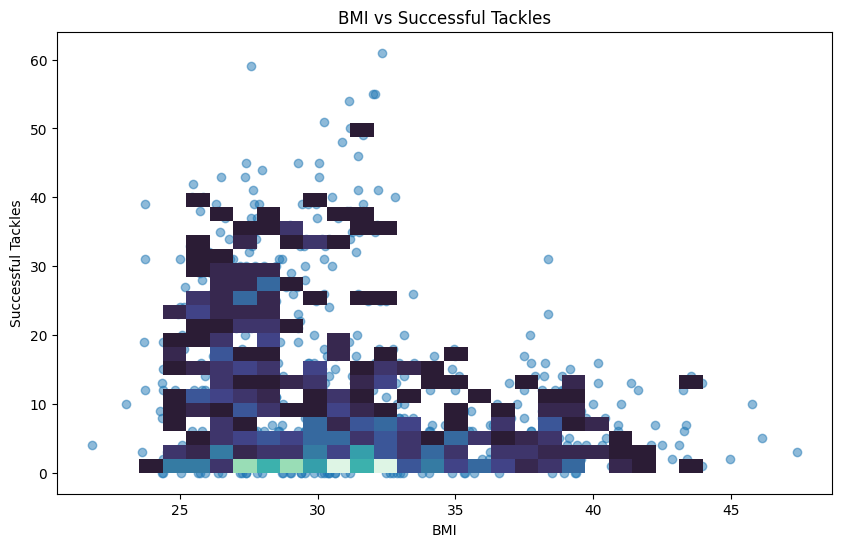

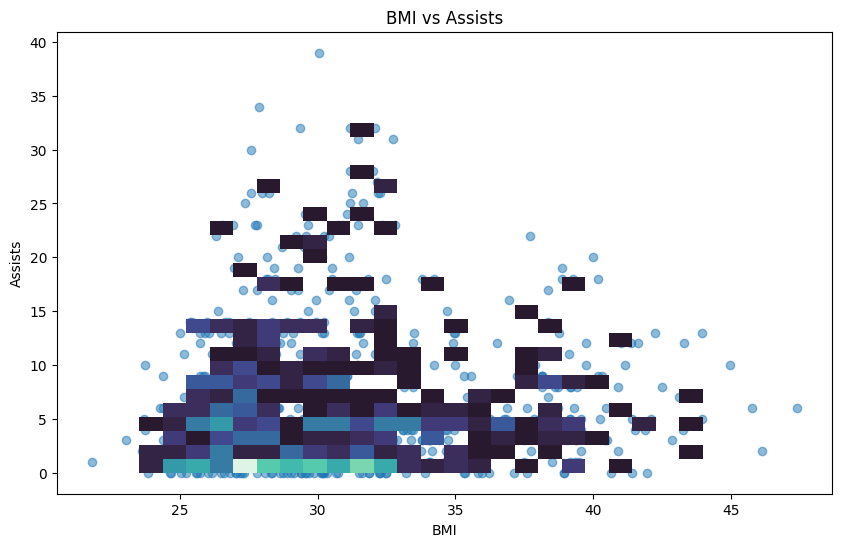

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
plt.scatter(final_df['bmi'], final_df['tackle'], alpha=0.5)
sns.histplot(final_df, x="bmi", y="tackle", bins=30, pthresh=.1, cmap="mako")
plt.title('BMI vs Successful Tackles')
plt.xlabel('BMI')
plt.ylabel('Successful Tackles')
plt.show()

# Create a scatter plot for BMI vs assists
plt.figure(figsize=(10, 6))
plt.scatter(final_df['bmi'], final_df['assist'], alpha=0.5)
sns.histplot(final_df, x="bmi", y="assist", bins=30, pthresh=.1, cmap="mako")
plt.title('BMI vs Assists')
plt.xlabel('BMI')
plt.ylabel('Assists')
plt.show()

### top 10 players who missed tackles

In [21]:
# Sort the dataframe by 'pff_missedTackle' in descending order and take the top 10
top_missed_tacklers = final_df.sort_values('pff_missedTackle', ascending=False).head(10)
top_missed_tacklers.head(10)

,nflId,tackle,assist,forcedFumble,pff_missedTackle,displayName,collegeName,position,bmi
696,54502,34,20,0,19,Jalen Pitre,Baylor,FS,27.124598
238,44926,35,17,0,16,Rayshawn Jenkins,Miami,SS,29.025203
425,47913,43,20,0,13,Drue Tranquill,Notre Dame,ILB,30.043514
446,47996,41,13,1,13,Donovan Wilson,Texas A&amp;M,SS,27.667090
584,53445,39,24,1,13,Zaven Collins,Tulsa,OLB,31.647869
351,46527,33,11,1,12,Frankie Luvu,Washington State,ILB,29.372685
690,54492,34,32,0,12,Devin Lloyd,Utah,ILB,29.372685
337,46304,55,28,0,12,Zaire Franklin,Syracuse,OLB,32.007026
209,44848,44,26,1,11,Budda Baker,Washington,SS,27.979300
701,54513,37,14,0,11,Jaquan Brisker,Penn State,SS,26.650414


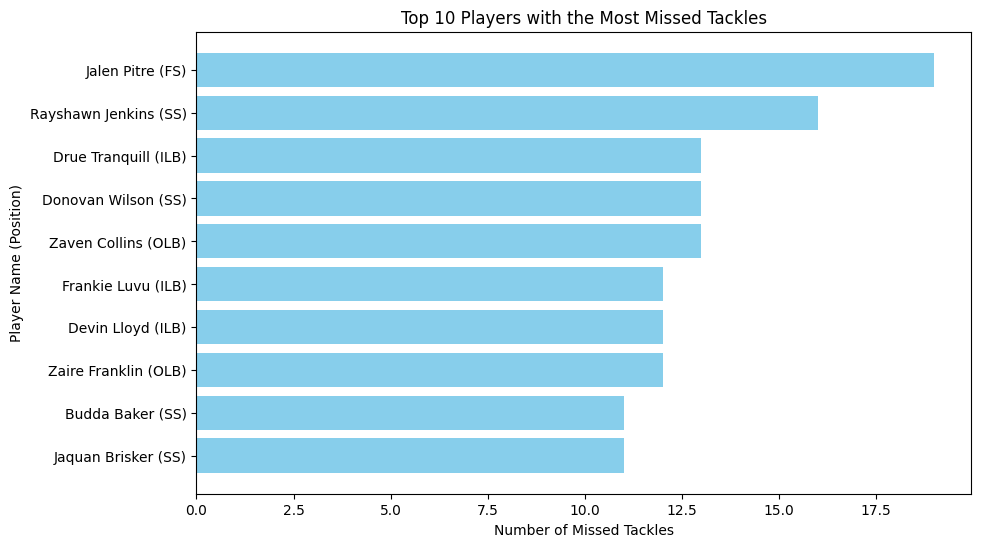

In [22]:
top_missed_tacklers['name_and_position'] = top_missed_tacklers['displayName'] + ' (' + top_missed_tacklers['position'] + ')'

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.barh(top_missed_tacklers['name_and_position'], top_missed_tacklers['pff_missedTackle'], color='skyblue')
plt.xlabel('Number of Missed Tackles')
plt.ylabel('Player Name (Position)')
plt.title('Top 10 Players with the Most Missed Tackles')
plt.gca().invert_yaxis()  # Invert y-axis to have the player with the most missed tackles at the top
plt.show()